**We are taking a look at the 2022 NFL Combine player information to see if we can utilize the information in there to answer some sports research questions, as well as how some stats can help streamline a teams recruitment. The questions we'll be taking a look at today will be:**

1.   Is there a relationship between players weight and how high they can go on a vertical leap.
2.   Can a players height be a factor in their hand size?
3.   Do heavier players tend to have a slower 40 yard dash time?

*We are assuming that all these relationships are false going into the testing.*




# Import and alias modules we will be using to conduct our assessments.




In [1]:
import math 
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Import data

In [2]:
#read in data
participants = pd.read_csv("https://raw.githubusercontent.com/MattLane6962/Combine2022/main/2022combine%20data.csv")

participants.info() #Gather information on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        315 non-null    object 
 1   College     314 non-null    object 
 2   POS         315 non-null    object 
 3   Height      315 non-null    float64
 4   Weight      315 non-null    int64  
 5   Hand Size   315 non-null    float64
 6   Arm Length  315 non-null    float64
 7   40Yard      234 non-null    float64
 8   Vert Leap   225 non-null    float64
 9   Broad Jump  219 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 24.7+ KB


# Explore our data

In [3]:
participants.head(10) #A snapshot of what the first 10 records look like

,Name,College,POS,Height,Weight,Hand Size,Arm Length,40Yard,Vert Leap,Broad Jump
0,Austin Allen,Nebraska,TE,79.63,253,9.50,33.63,4.83,34.0,121.0
1,Chase Allen,Iowa State,TE,78.00,251,9.63,34.13,NaN,33.5,117.0
2,Christopher Allen,Alabama,OLB,75.50,241,10.00,33.00,NaN,NaN,NaN
3,Tyler Allgeier,Brigham Young,RB,70.75,224,9.63,31.50,4.60,33.0,120.0
4,Troy Andersen,Montana State,OLB,75.50,243,9.25,32.13,4.42,36.0,128.0
5,Tycen Anderson,Toledo,FS,73.88,209,10.13,33.00,4.36,35.5,123.0
6,Blaise Andries,Minnesota,OG,78.25,308,9.88,33.88,5.10,30.5,106.0
7,Jalyn Armour-Davis,Alabama,CB,72.63,197,9.25,30.88,4.39,34.5,NaN
8,Brian Asamoah,Oklahoma,ILB,72.50,225,10.00,33.00,4.56,36.5,124.0
9,Calvin Austin,Memphis,WR,67.75,170,9.25,30.00,4.32,39.0,135.0


In [4]:
participants.describe() #Descriptive statistics for our fields.

,Height,Weight,Hand Size,Arm Length,40Yard,Vert Leap,Broad Jump
count,315.000000,315.000000,315.000000,315.000000,234.000000,225.000000,219.000000
mean,74.187492,241.749206,9.601460,32.304730,4.710769,32.546667,117.785388
std,2.730448,48.496608,0.581857,1.545569,0.307867,4.505830,8.846010
min,67.500000,170.000000,8.000000,27.630000,4.230000,20.000000,95.000000
25%,72.130000,201.000000,9.250000,31.190000,4.480000,29.500000,111.000000
50%,74.380000,228.000000,9.630000,32.380000,4.600000,33.000000,120.000000
75%,76.130000,283.000000,10.000000,33.440000,4.920000,36.000000,124.000000
max,80.000000,384.000000,11.250000,36.130000,5.620000,42.000000,136.000000


# Cleaning Fields

In [5]:
participants.isnull().sum() #counting nulls in all categories

Name           0
College        1
POS            0
Height         0
Weight         0
Hand Size      0
Arm Length     0
40Yard        81
Vert Leap     90
Broad Jump    96
dtype: int64

In [6]:
clean_df = participants.dropna() #dropping nulls in our dataset.
clean_df.describe() #Checking the effects of our drop and that there still
#is enough remaining to adequately perform our testing.

,Height,Weight,Hand Size,Arm Length,40Yard,Vert Leap,Broad Jump
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,74.358511,246.095745,9.654628,32.431809,4.729947,32.550532,117.893617
std,2.752178,48.505156,0.587499,1.589478,0.307673,4.451924,8.999071
min,67.500000,170.000000,8.000000,27.630000,4.280000,20.000000,95.000000
25%,72.380000,206.500000,9.250000,31.347500,4.480000,29.500000,111.000000
50%,74.630000,232.000000,9.630000,32.565000,4.630000,33.000000,120.000000
75%,76.380000,304.000000,10.130000,33.500000,4.952500,36.000000,124.000000
max,80.000000,341.000000,11.250000,36.130000,5.440000,42.000000,136.000000


# Taking a dive into the relationships in our data

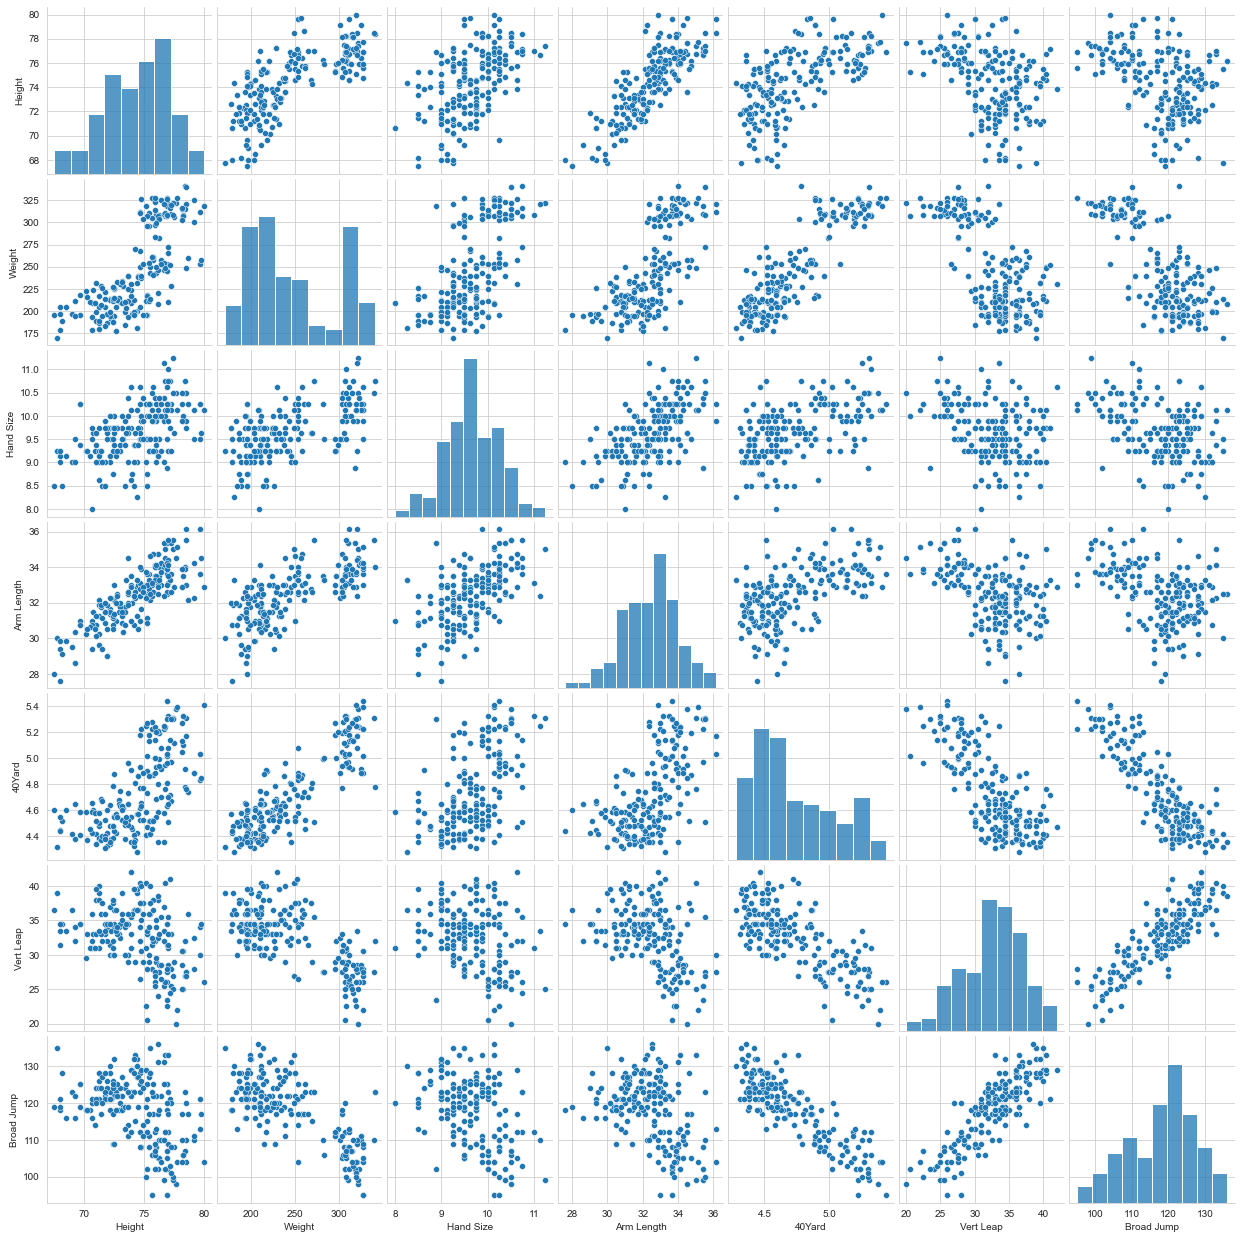

In [7]:
sns.pairplot(clean_df, vars = ['Height', 'Weight', 'Hand Size', 'Arm Length', '40Yard', 'Vert Leap', 'Broad Jump']) 

# Looking exclusively at the relationship in the fields we plan on testing.

<AxesSubplot:xlabel='Weight', ylabel='Vert Leap'>

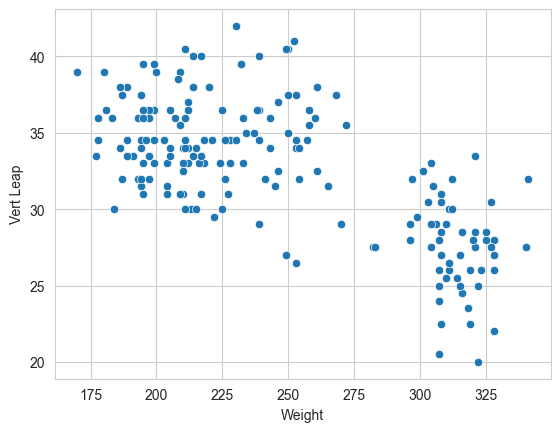

In [8]:
sns.scatterplot(x = "Weight", y = "Vert Leap", data = clean_df) #Relationship between weight and Vertical Leap

<AxesSubplot:xlabel='Height', ylabel='Hand Size'>

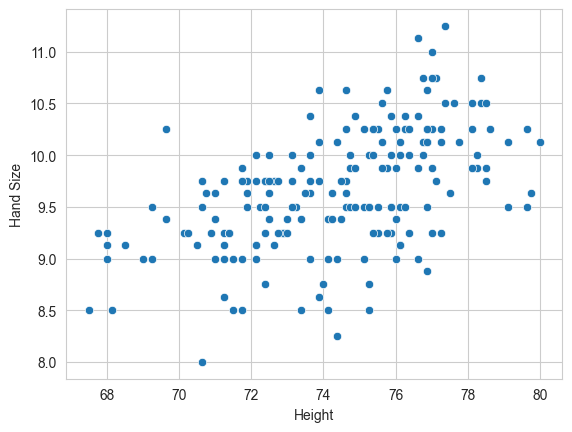

In [9]:
sns.scatterplot(x = "Height", y = "Hand Size", data = clean_df) #Height and Hand Size

<AxesSubplot:xlabel='Weight', ylabel='40Yard'>

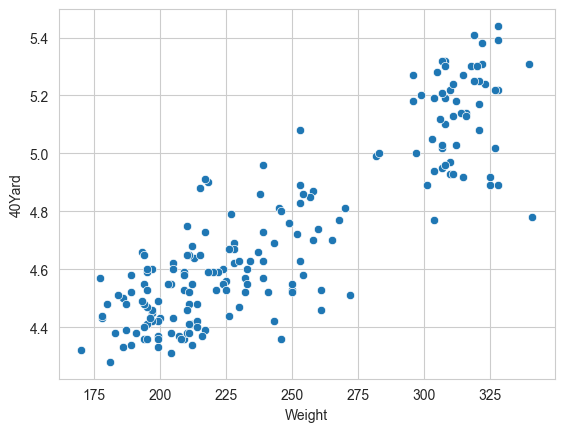

In [10]:
sns.scatterplot(x = 'Weight', y = '40Yard', data = clean_df) #Weight and 40 yard dash time

# Analyze the Dataset

In [11]:
# Pearson R-test for correlation between weight and vertical jump.
stats.pearsonr(clean_df['Weight'], clean_df['Vert Leap'])

(-0.6761075605565661, 1.8248737991637125e-26)

With a probability value [a number describing how likely it is that your data would have occurred under the null hypothesis of your statistical test] that small we can see there is a statistically significant relationship between weight and vertical leap. We can also see that its a negative which means that the heavier a player is the less height he can achieve on a vertical jump.

In [12]:
#Another test to check the relationship between height and hand size.
stats.pearsonr(clean_df['Height'],clean_df['Hand Size'])

(0.5221767885051699, 1.5273200664362415e-14)

Again, our probability value shows a significance in taller players having a larger hand size. Asserting that taller athletes tend to have larger hands.

In [13]:
#And finally testing for a relationship between weight and 40 yard dash times.
stats.pearsonr(clean_df['Weight'],clean_df['40Yard'])

(0.8757587924601592, 9.901091553913835e-61)

This test shows our strongest relationship in the data, disproving the hypothesis that weight is not a factor in a players 40 yard dash times and that heavier athletes tend to take longer to complete this exercise.

**The results of our testing here can be useful for both research and  to help streamline recruitment, perhaps if you are looking for a faster player for your team you may want to look at factors like weight if you do not have a dash time. Perhaps consider taller players as receivers. Also, helpful to be aware that larger defensive players may not have as much verticality for pass protection.**